In [1]:
import pandas as pd
import pendulum

In [2]:
df = pd.read_csv('data/binance-1m-btcusdt-20221223.csv', names=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

In [3]:
df

,timestamp,open,high,low,close,volume
0,1502942400000,4261.48,4261.48,4261.48,4261.48,1.775183
1,1502942460000,4261.48,4261.48,4261.48,4261.48,0.000000
2,1502942520000,4280.56,4280.56,4280.56,4280.56,0.261074
3,1502942580000,4261.48,4261.48,4261.48,4261.48,0.012008
4,1502942640000,4261.48,4261.48,4261.48,4261.48,0.140796
...,...,...,...,...,...,...
2785250,1670570520000,17223.90,17224.86,17222.63,17223.17,47.350010
2785251,1670570580000,17223.74,17224.45,17221.15,17222.46,104.189840
2785252,1670570640000,17222.46,17224.45,17220.82,17221.32,86.865270
2785253,1670570700000,17221.32,17225.97,17218.84,17223.41,132.656500


In [4]:
t = 1502942400000
miss = []
for i in df['timestamp']:
    while i != t:
        miss.append(t)
        t += 60 * 1000

    t += 60 * 1000

In [5]:
len(miss)

8552

In [6]:
len(miss) / (len(df) + len(miss)) * 100

0.3061056114470327

In [7]:
# 打印出缺失的时间段
for i, m in enumerate(miss):
    # print(m)
    if i == 0:
        print(f'start: {pendulum.from_timestamp(miss[i]/1000).to_datetime_string()}')
    elif i == len(miss) - 1:
        print(f'end: {pendulum.from_timestamp(miss[i]/1000).to_datetime_string()}')
    elif miss[i-1] == m - 60 * 1000 and miss[i+1] != m + 60 * 1000:
        print(f'end: {pendulum.from_timestamp(miss[i]/1000).to_datetime_string()}')
    elif miss[i-1] != m - 60 * 1000 and miss[i+1] == m + 60 * 1000:
        print(f'start: {pendulum.from_timestamp(miss[i]/1000).to_datetime_string()}')

start: 2017-09-06 16:01:00
end: 2017-09-06 22:59:00
start: 2017-12-04 06:01:00
end: 2017-12-04 06:48:00
start: 2017-12-18 10:01:00
end: 2017-12-18 10:13:00
start: 2017-12-18 12:30:00
end: 2017-12-18 13:33:00
start: 2018-01-04 03:01:00
end: 2018-01-04 05:05:00
start: 2018-02-08 00:29:00
end: 2018-02-09 09:59:00
start: 2018-02-10 06:00:00
end: 2018-02-10 06:14:00
start: 2018-02-11 04:01:00
end: 2018-02-11 04:34:00
start: 2018-06-26 02:00:00
end: 2018-06-26 11:59:00
start: 2018-06-27 13:00:00
end: 2018-06-27 14:44:00
start: 2018-07-04 00:23:00
end: 2018-07-04 07:59:00
start: 2018-10-19 06:00:00
end: 2018-10-19 09:29:00
start: 2018-11-14 02:00:00
end: 2018-11-14 08:59:00
start: 2019-03-12 02:00:00
end: 2019-03-12 07:59:00
start: 2019-05-15 03:00:00
end: 2019-05-15 12:59:00
start: 2019-06-07 21:14:00
end: 2019-06-07 22:14:00
start: 2019-08-15 02:00:00
end: 2019-08-15 09:59:00
start: 2019-11-13 02:00:00
end: 2019-11-13 04:19:00
start: 2019-11-13 05:30:00
end: 2019-11-13 05:32:00
start: 2019-

In [8]:
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

In [9]:
df['pct_change'] = df['close'].pct_change()

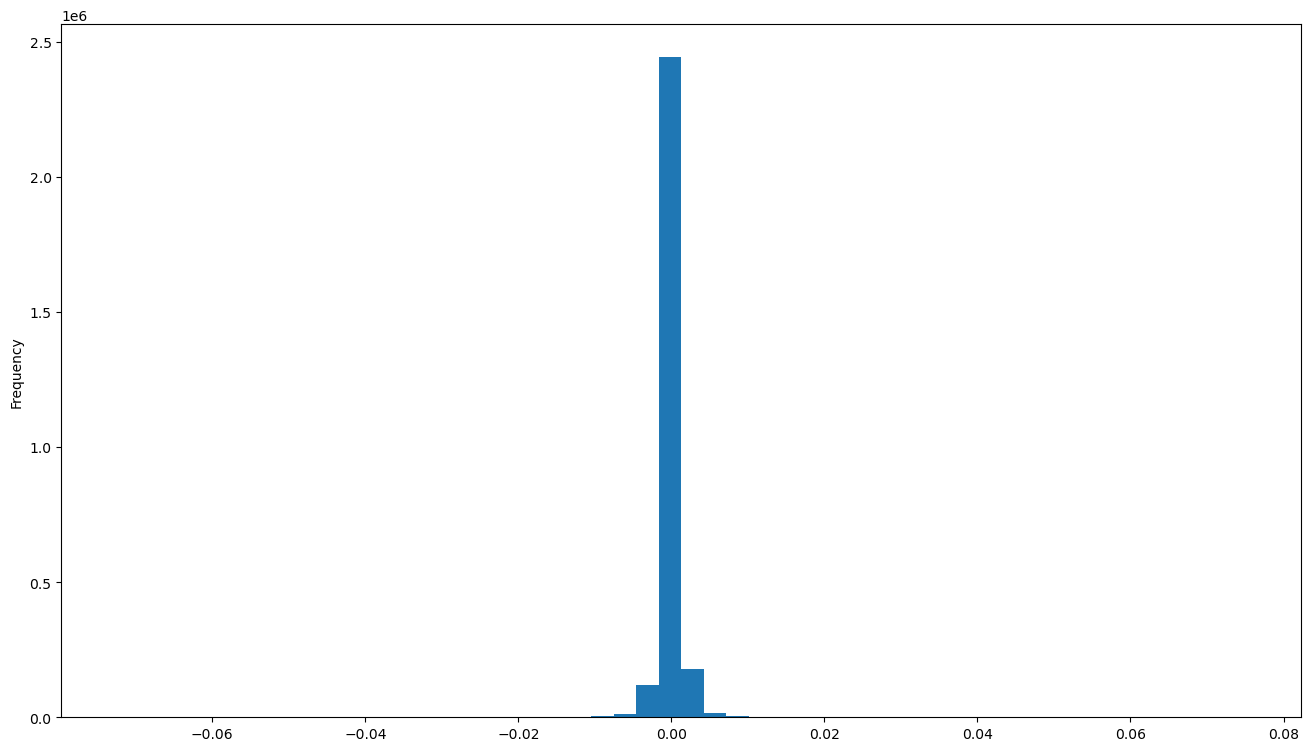

In [10]:
df['pct_change'].plot.hist(figsize=(16, 9), bins=50)

In [15]:
df.loc[df['pct_change'] >= 0, 'label'] = 1

In [17]:
df.loc[df['pct_change'] < 0, 'label'] = 0

In [23]:
df.loc[0]['label'] = 1

C:\Users\Blueness\AppData\Local\Temp\ipykernel_10132\229002672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[0]['label'] = 1


In [26]:
len(df.loc[df['pct_change'] > 0]) / len(df) * 100

48.87566847559739

In [27]:
len(df.loc[df['pct_change'] == 0]) / len(df) * 100

2.4406382898513783

In [28]:
len(df.loc[df['pct_change'] < 0]) / len(df) * 100

48.68365733119588

In [37]:
l = int(len(df) * 0.98)

In [38]:
training_data = df.head(l)

In [40]:
test_data = df.tail(len(df) - l)

In [41]:
len(test_data)

55706

In [42]:
training_data.to_csv('out_training_data.csv')
test_data.to_csv('out_test_data.csv')